In [48]:
import tensorflow as tf
import keras
import pandas as pd
import sklearn 
import tensorflow.keras.layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

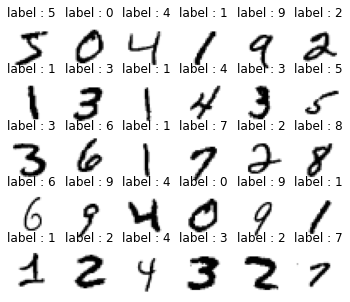

In [12]:
fig, ax = plt.subplots(5, 6, figsize = (6,5))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'label : {y_train[i]}')
    ax.imshow(x_train[i], cmap = 'binary')
plt.show()

In [23]:
from tensorflow.keras import layers

In [24]:
x_train=x_train/255
x_test=x_test/255
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)



In [25]:
print(x_train_flattened.shape)

(60000, 784)


In [27]:
input = tensorflow.keras.layers.Input(shape = (28,28))
x = tensorflow.keras.layers.LSTM(64, activation = "relu")(input)
out = tensorflow.keras.layers.Dense(10, activation = "softmax")(x)

model = tf.keras.models.Model(input, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer  ="adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
fitted_model = model.fit(x_train, y_train, epochs = 8)


Epoch 1/8
1875/1875 [==============================] - 23s 12ms/step - loss: 1.1438 - acc: 0.5772
Epoch 2/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.9362 - acc: 0.6644
Epoch 3/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7276 - acc: 0.7556
Epoch 4/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6240 - acc: 0.7926
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5519 - acc: 0.8176
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4625 - acc: 0.8461
Epoch 7/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3996 - acc: 0.8686
Epoch 8/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3628 - acc: 0.8828


In [35]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: {0}, Accuracy: {1}".format(loss, accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.3184 - acc: 0.8898
Loss: 0.3184027075767517, Accuracy: 0.8898000121116638


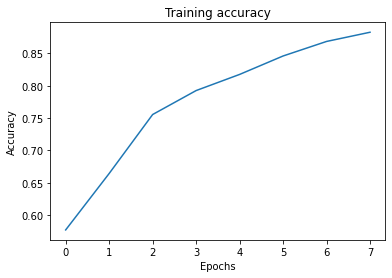

In [37]:
accuracy = fitted_model.history['acc']
epochs = range(0, 8)

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, accuracy)
plt.show()


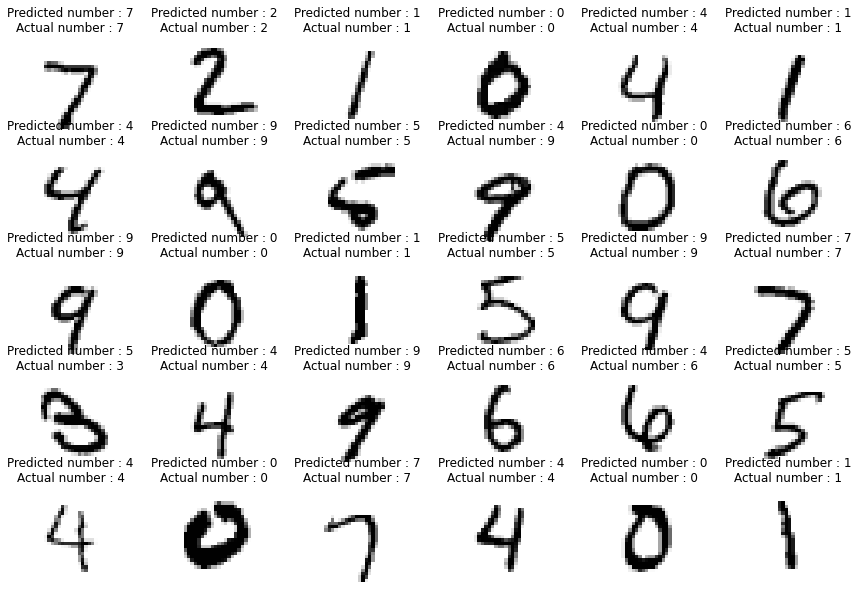

In [42]:
y_pred = model.predict(x_test)

fig, ax = plt.subplots(5, 6, figsize = (15,10))
for i, ax in enumerate(ax.flatten()):
    ax.axis('off')
    ax.set_title(f'Predicted number : {y_pred[i].argmax()}\nActual number : {y_test[i]}')
    ax.imshow(x_test[i], cmap ='binary')
plt.show()

In [45]:
model.evaluate(x_test,y_test)
predicted_y=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3184 - acc: 0.8898


In [46]:
y_predicted=[]
for i in range(0,len(predicted_y)) :
    y_predicted.append(np.argmax(predicted_y[i]))


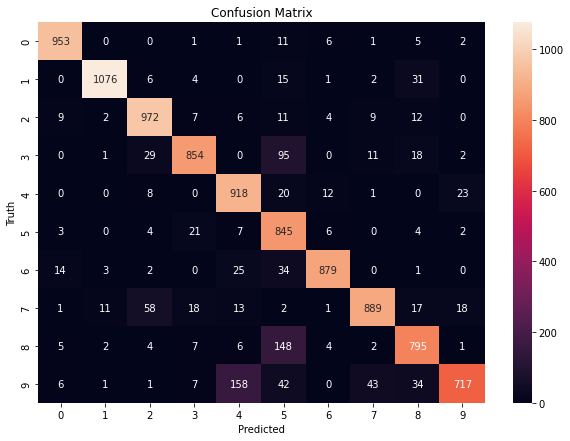

In [49]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()